In [1]:
from setting import *

%matplotlib inline

In [2]:
kr_tickers = ['KS11']
kr_names = ['kospi']
us_tickers = ['^GSPC']
us_names = ['S&P500']

In [3]:
spy = getHistoryByYf(us_tickers, us_names)   
kospi = getHistoryByFdr(kr_tickers, kr_names)

[*********************100%***********************]  1 of 1 completed


In [4]:
data = pd.merge(kospi, spy, how='outer', on='Date')
data = data.sort_values(by=['Date'],ascending=True)
data = data.fillna(method='ffill')
data = data.dropna()
print('data \n', data)

data 
                   kospi       S&P500
Date                                
1996-12-11   704.679993   740.729980
1996-12-12   689.380005   729.299988
1996-12-13   689.070007   728.640015
1996-12-16   673.919983   720.979980
1996-12-17   663.349976   726.039978
...                 ...          ...
2022-11-25  2437.860107  4026.120117
2022-11-28  2408.270020  3963.939941
2022-11-29  2433.389893  3957.629883
2022-11-30  2472.530029  4080.110107
2022-12-01  2479.959961  4080.110107

[6734 rows x 2 columns]


In [5]:
assets = data.resample('M').last()
print('assets \n', assets)

assets 
                   kospi       S&P500
Date                                
1996-12-31   651.219971   740.739990
1997-01-31   685.840027   786.159973
1997-02-28   676.530029   790.820007
1997-03-31   677.340027   757.119995
1997-04-30   703.229980   801.340027
...                 ...          ...
2022-08-31  2472.050049  3955.000000
2022-09-30  2155.489990  3585.620117
2022-10-31  2293.610107  3871.979980
2022-11-30  2472.530029  4080.110107
2022-12-31  2479.959961  4080.110107

[313 rows x 2 columns]


In [6]:
equalWeight = Equal_Weight_BT(assets, name='Equally Weighted')

relativeMomentum = {}
for i in range(0, 12):
    relativeMomentum[i] = Relative_Momentum_BT(assets, 1, i+1, 'momentum_{}'.format(str(i+1)))

report = bt.run(equalWeight, *relativeMomentum.values())

Stat                 Equally Weighted    momentum_1    momentum_2    momentum_3    momentum_4    momentum_5    momentum_6    momentum_7    momentum_8    momentum_9    momentum_10    momentum_11    momentum_12
-------------------  ------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  -------------  -------------  -------------
Start                1996-12-30          1996-12-30    1996-12-30    1996-12-30    1996-12-30    1996-12-30    1996-12-30    1996-12-30    1996-12-30    1996-12-30    1996-12-30     1996-12-30     1996-12-30
End                  2022-12-31          2022-12-31    2022-12-31    2022-12-31    2022-12-31    2022-12-31    2022-12-31    2022-12-31    2022-12-31    2022-12-31    2022-12-31     2022-12-31     2022-12-31
Risk-free rate       0.00%               0.00%         0.00%         0.00%         0.00%         0.00%         0.00%         0.00%         0.00%         0.00%      

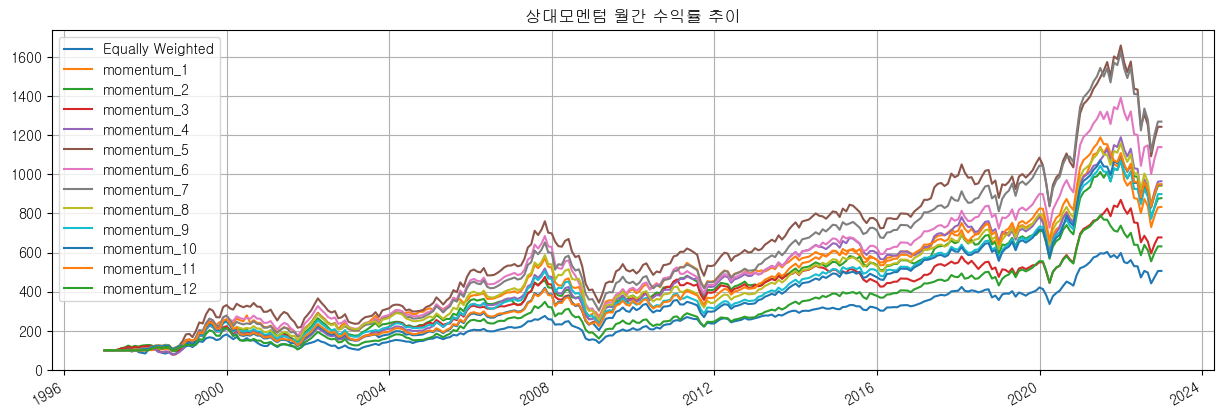

In [7]:
report.plot()
plt.title('상대모멘텀 월간 수익률 추이')

print(report.display())
print(report.display_monthly_returns())